**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [3]:
# Import the dataset
dataset = pd.read_excel('datasets/default_of_credit_card_clients.xls')

In [4]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [5]:
dataset[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,50646.744233,48624.349167,4.649736e+04,42791.362167,39884.398167,38480.350933
std,73376.695080,70893.963498,6.910251e+04,64090.316188,60606.644833,59406.836932
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3234.000000,2682.000000,2.403000e+03,2034.000000,1534.000000,1080.000000
50%,21644.500000,20597.000000,1.975250e+04,18759.500000,17835.500000,16643.000000
75%,66148.500000,62999.750000,5.952675e+04,53572.250000,49804.000000,48863.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002354F89E208>,
      dtype=object)

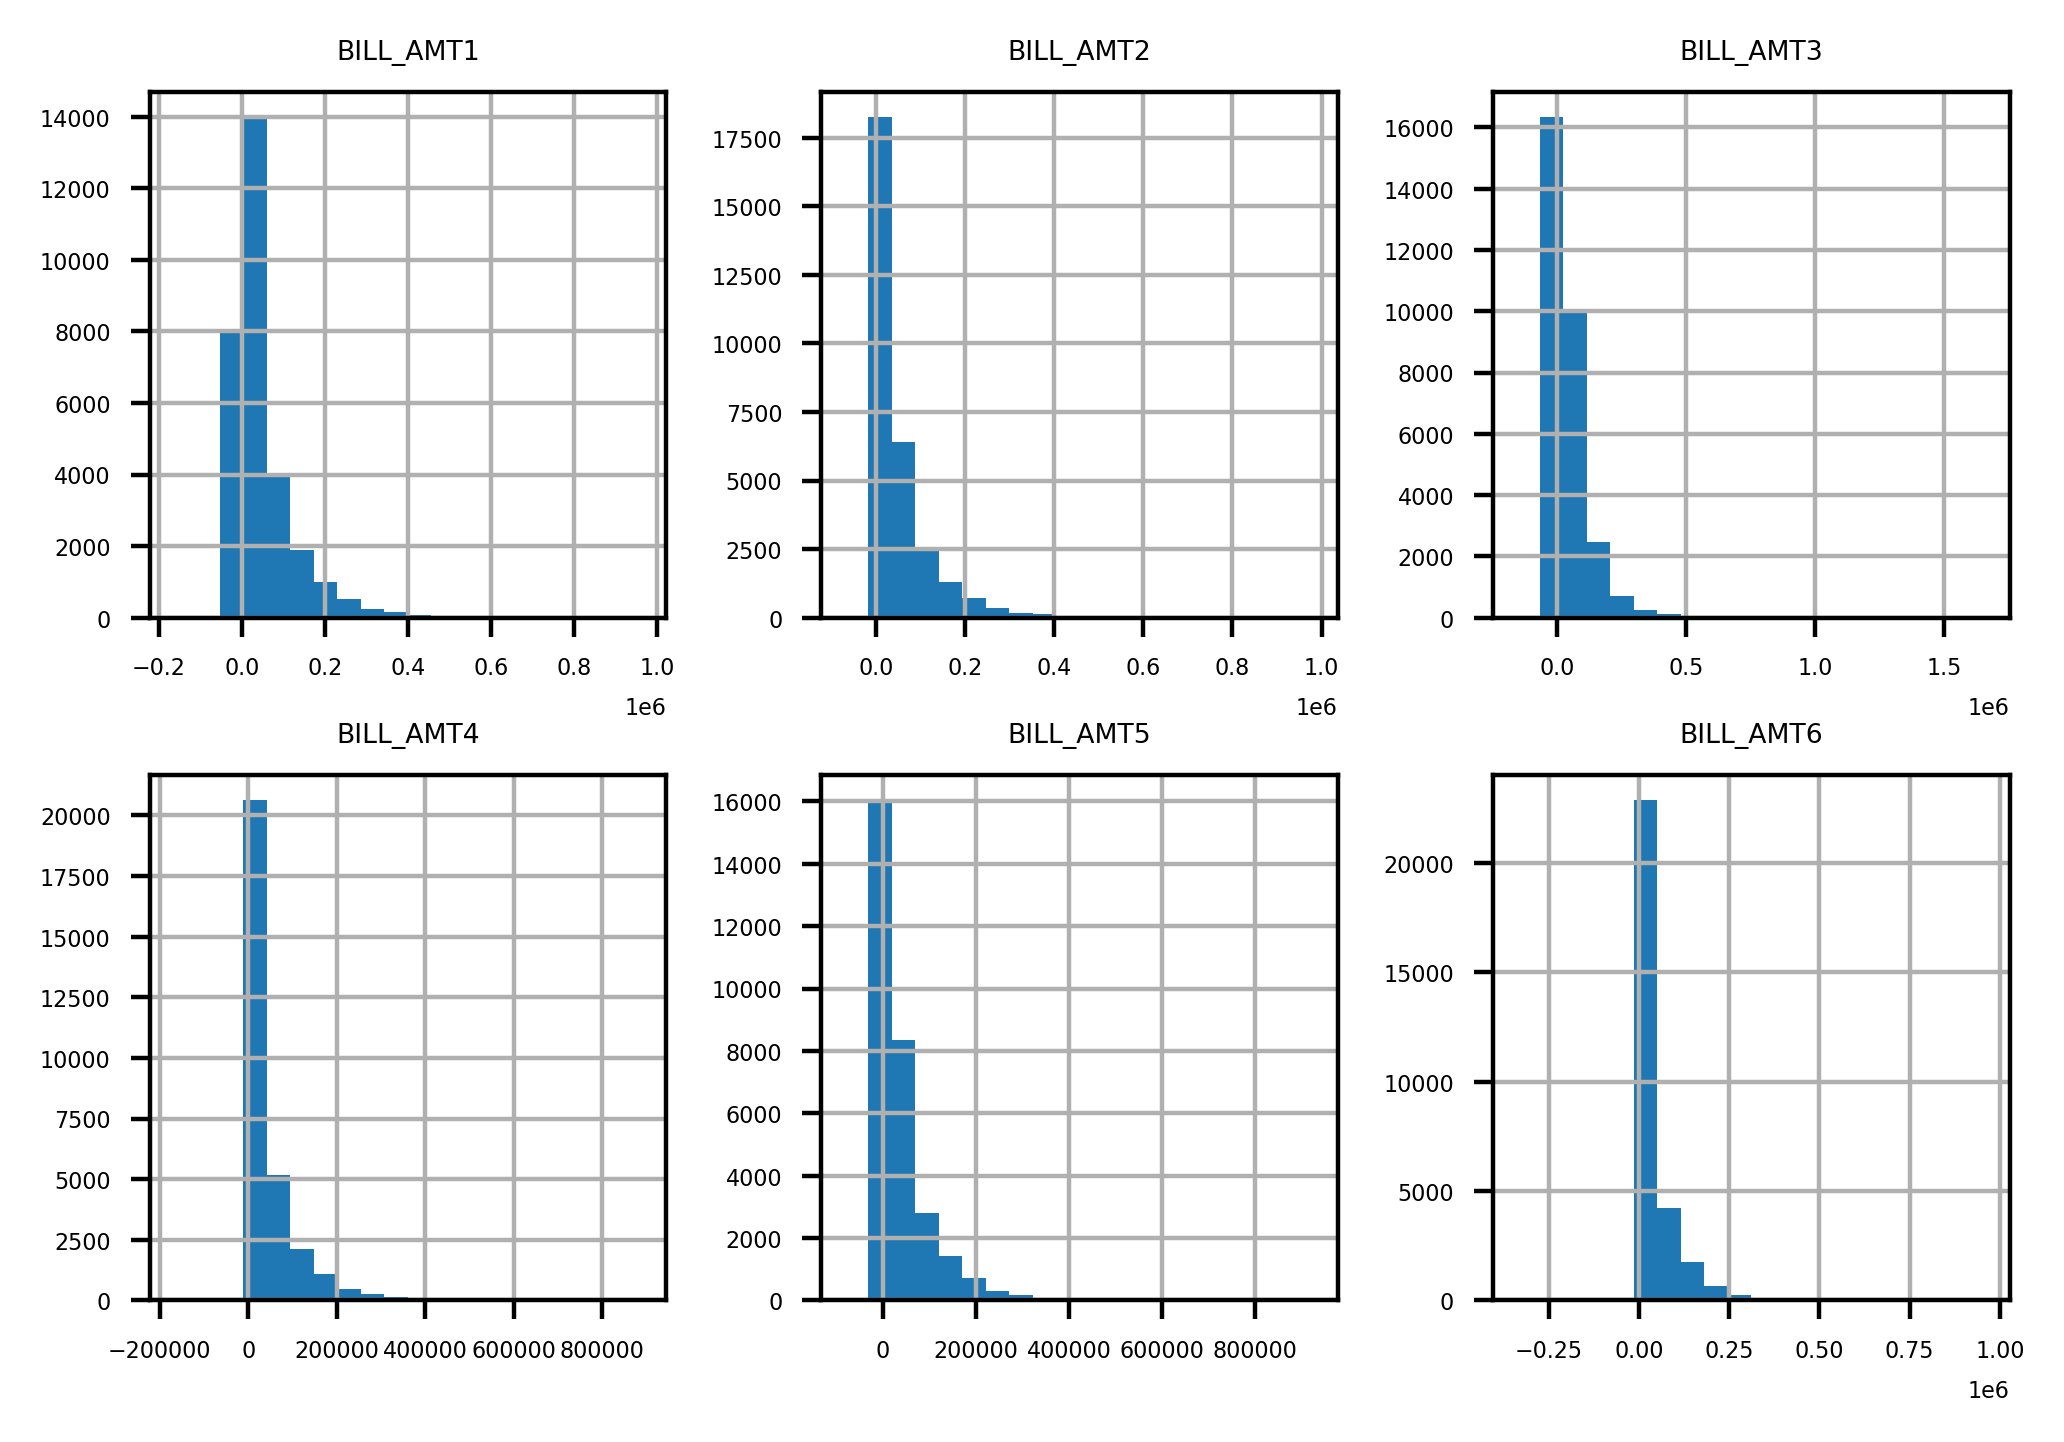

In [6]:
dataset[bill_feats].hist(bins=20, layout=(2,3))

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [7]:
dataset[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267
std,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000
50%,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002354C6F1988>,
      dtype=object)

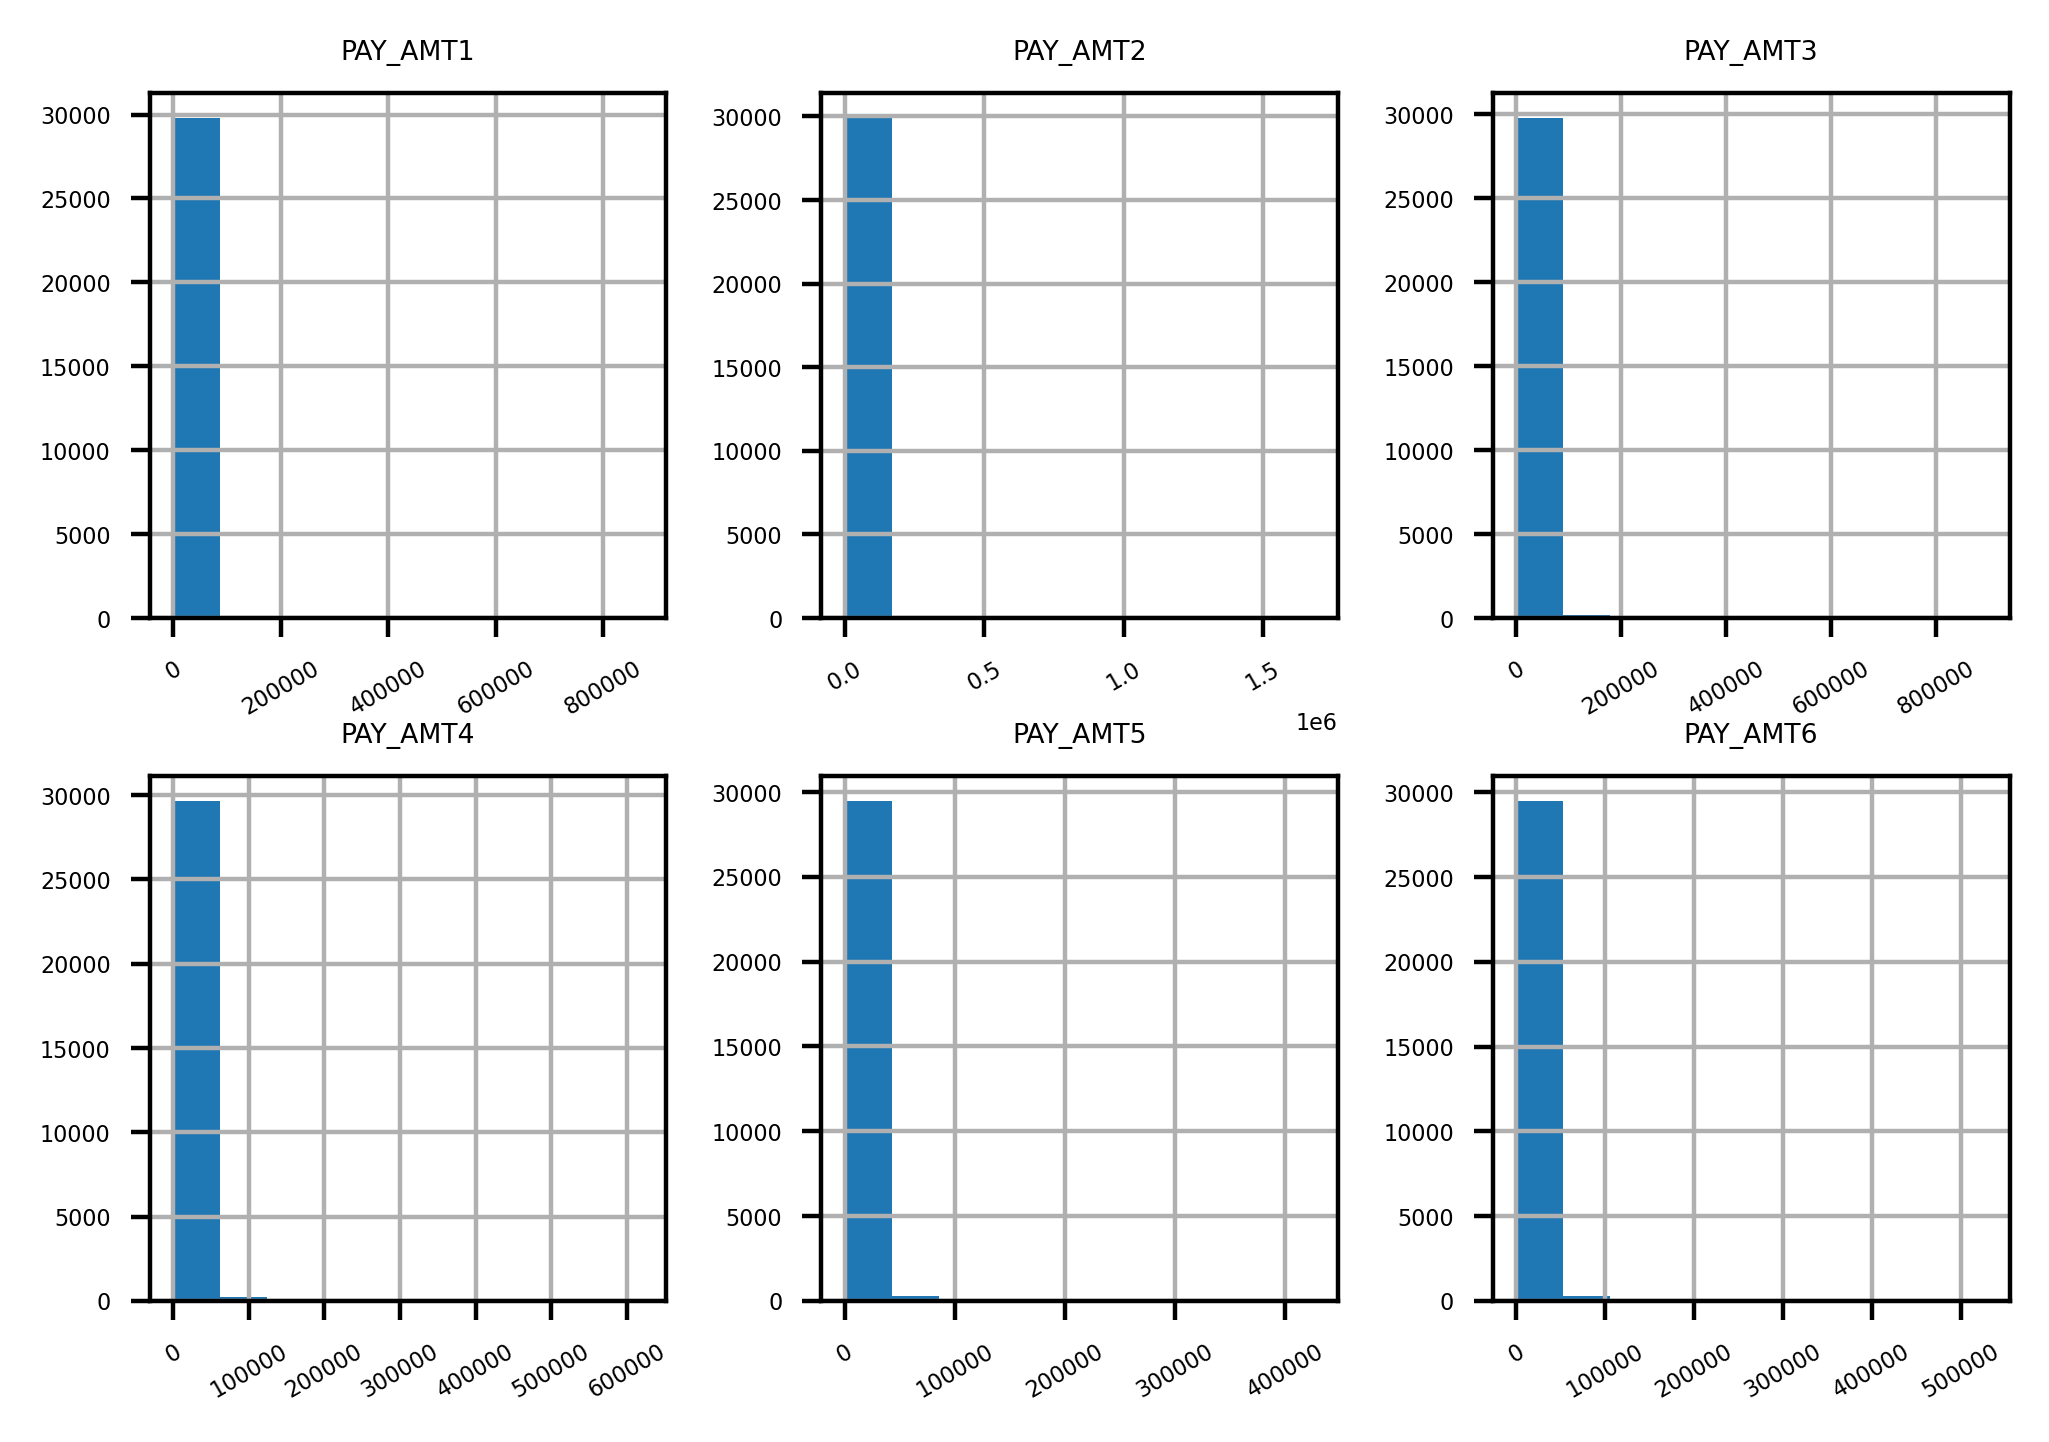

In [8]:
dataset[pay_amt_feats].hist(layout=(2,3), xrot=30)

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [9]:
# Create Boolean mask
pay_zero_boolean_mask = dataset[pay_amt_feats] == 0

In [10]:
# Use `.head()`
pay_zero_boolean_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
# Use `.sum()`
pay_zero_boolean_mask.sum()

PAY_AMT1    5504
PAY_AMT2    5663
PAY_AMT3    6223
PAY_AMT4    6660
PAY_AMT5    6955
PAY_AMT6    7416
dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002354EB9DE08>,
      dtype=object)

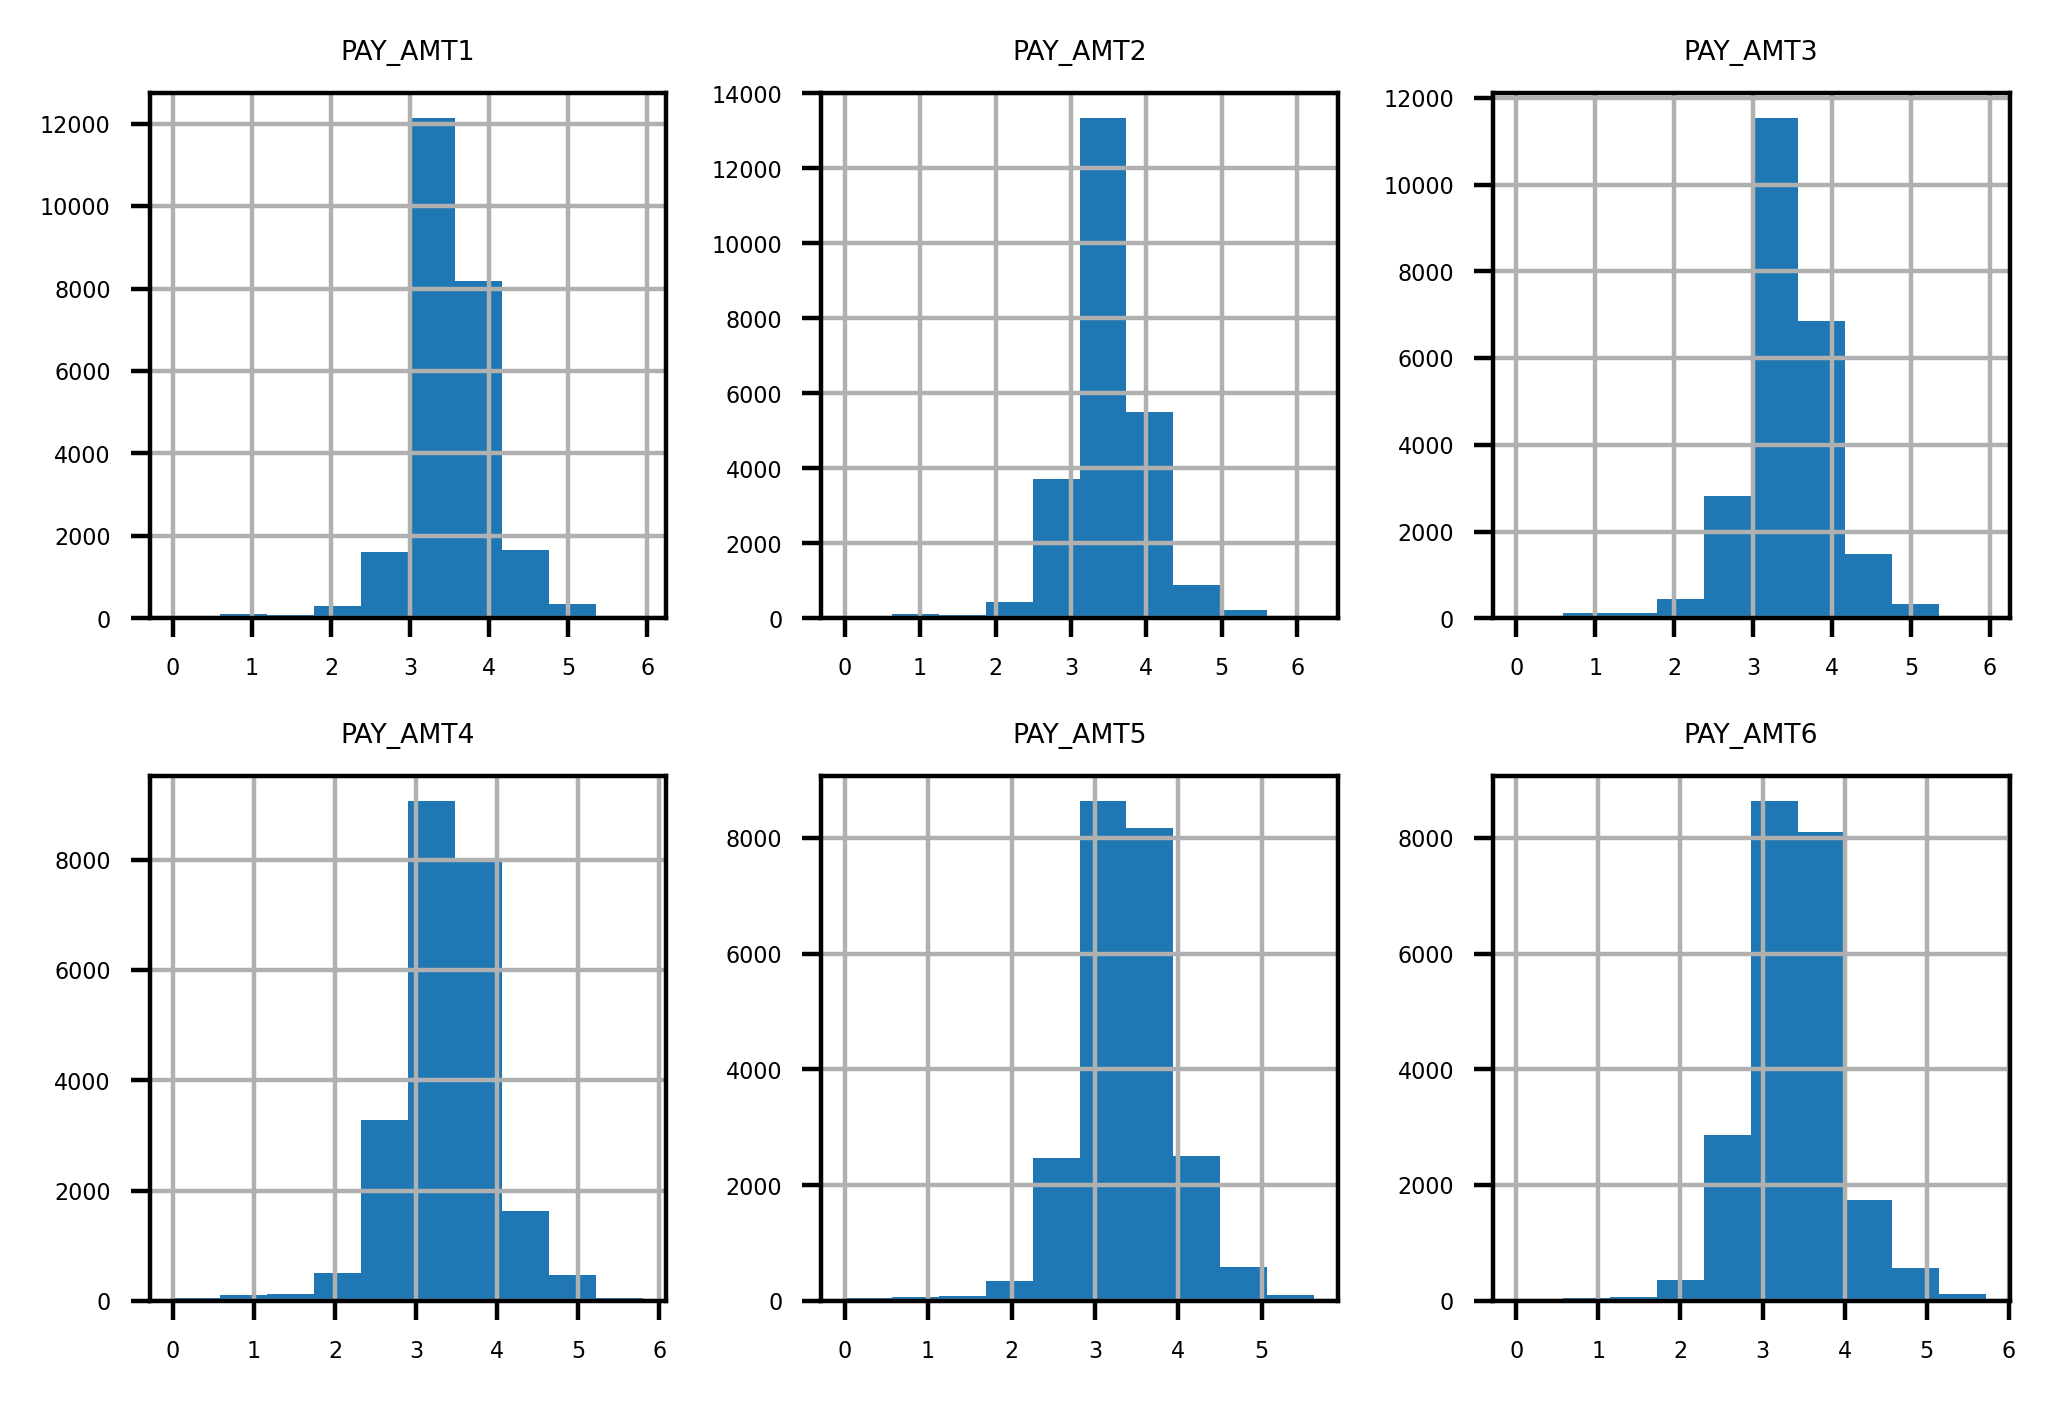

In [12]:
dataset[pay_amt_feats][~pay_zero_boolean_mask].apply(np.log10).hist(layout=(2,3))